## 키워드 분석(Keyword Analysis)

###### 1 : 핵심어(keyword)란 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구
###### 2 : 핵심어 분석이란 불용어 제거와 어간추출 및 형태소 분석 등의 자연어 처리를 시행한 후 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 핵심어를 추출
###### 3 : 특정 텍스트 자료에 많이 나타나는 형태소가 그 텍스트 주제를 표출할 가능성이 높다는 가정에 기초
###### 4 : 특정 빈도 분석에서 영어의 전치사나 한국어의 조사와 같이 의미를 별로 담고 있지 않은 불용어는 제외하는 것이 좋음
###### 5 : 키워드 분석은 텍스트의 주제 추정, 텍스트 유사도, 검색 엔진의 검색 결과 우선 순위 측정 등 다양하게 사용될 수 있음

#### 한글 폰트 설정

In [35]:
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

In [36]:
font_list = [font.name for font in fm.fontManager.ttflist]

In [37]:
font_list

['STIXSizeFourSym',
 'DejaVu Serif Display',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Serif',
 'cmsy10',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'cmtt10',
 'cmex10',
 'STIXSizeTwoSym',
 'cmb10',
 'cmr10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeFiveSym',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'cmmi10',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'cmss10',
 'STIXNonUnicode',
 'Yet R',
 'Palatino Linotype',
 'Vivaldi',
 'Snap ITC',
 'Poor Richard',
 'Edwardian Script ITC',
 'Calisto MT',
 'Informal Roman',
 'HYsnrL',
 'Franklin Gothic Book',
 'Agency FB',
 'Baskerville Old Face',
 'Matura MT Script Capitals',
 'HYsanB',
 'Courier New',
 'Myanmar Text',
 'SimSun',
 'Curlz MT',
 'LG Smart UI',
 'Nirmala UI',
 'Cal

In [38]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [39]:
# test

In [40]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [41]:
x = np.arange(-5, 5, 0.01)

In [42]:
y= np.sin(x)

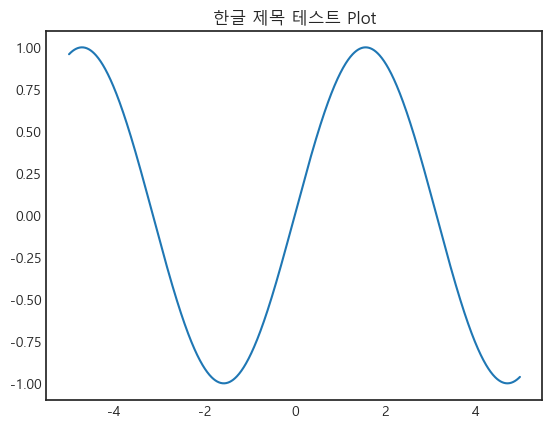

In [43]:
plt.figure().add_subplot().set_title("한글 제목 테스트 Plot")
plt.plot(x,y)

In [18]:
!pip install konlpy

In [19]:
!pip install eunjeon

In [20]:
from eunjeon import Mecab

In [21]:
tagger = Mecab()

## 네이버 영화 리뷰 데이터

###### 키워드 분석에는 네이버 영화 리뷰 데이터를 사용
###### 데이터 다운로드 : https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [22]:
import urllib.request

raw = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt").readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

###### 데이터를 확인해보면 모두 바디트로 이루어져 있으며, 리뷰 외의 다른 데이터도 존재
###### 데이터를 문자열로 변환하고 리뷰만 추출

In [23]:
raw = [x.decode() for x in raw[1:]]

reviews = []
for i in raw:
    reviews.append(i.split("\t")[1])
    
print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


#### 형태소 분석을 이용한 명사 추출

###### 형태소 분석기 Mecab으로 명사만 추출

In [26]:
from eunjeon import Mecab
tagger = Mecab()

nouns = []
for review in reviews:
    for noun in tagger.nouns(review):
        nouns.append(noun)
        
print(nouns[:10])

['때', '디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업']


#### 불용어(Stopwords)사전 만들기

###### 형태소 분석을 통해 조사, 접속사 등의 제거 가능
###### 하지만 한국어는 명사에서도 상당히 많은 불필요한 단어들이 포함
###### 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거 필요
###### 불용어 예: 전, 난, 일, 걸, 뭐, 줄, 만, 건, 등등등
###### 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요(예: 영화)

In [27]:
stop_words = "영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것"

In [28]:
stop_words = stop_words.split(" ")
print(stop_words)

['영화', '전', '난', '일', '걸', '뭐', '줄', '만', '건', '분', '개', '끝', '잼', '이거', '번', '중', '듯', '때', '게', '내', '말', '나', '수', '거', '점', '것']


#### 불용어를 제외하여 형태소 분석 수행

###### 한글 텍스트에 대하여 형태소 분석 수행
###### 분석으로 추출하는 명사 중에서 불용어에 표함되지 않는 텍스트만 추출하여 저장

In [30]:
nouns = []
for review in reviews:
    for noun in tagger.nouns(review):
        if noun not in stop_words:
            nouns.append(noun)
            
print(nouns[:10])

['디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업', '우리']


#### 단어 빈도수 측정

###### 단어 빈도수 측정에는 collections 라이브러리의 Counter 함수를 이용
###### collections 라이브러리는 내장 라이브러로 별도 설치가 필요 없음
###### counter를 이용하면 각 단어와 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능

In [31]:
from collections import Counter

nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
print(top_nouns)

{'연기': 9169, '최고': 8782, '평점': 8511, '생각': 7642, '스토리': 7166, '드라마': 6891, '사람': 6745, '감동': 6490, '배우': 5883, '내용': 5731, '감독': 5628, '재미': 5411, '시간': 5315, '년': 4923, '사랑': 4729, '쓰레기': 4586, '하나': 4005, '작품': 3982, '정도': 3664, '마지막': 3647, '액션': 3581, '이건': 3581, '기대': 3475, '장면': 3262, '편': 3055, '최악': 3024, '이게': 3021, '돈': 2974, '이야기': 2949, '느낌': 2906, '애': 2724, '처음': 2696, '여자': 2678, '이해': 2670, '이상': 2656, '명작': 2653, '한국': 2641, '주인공': 2550, '우리': 2528, '연출': 2384, '때문': 2372, '기억': 2369, '현실': 2191, '굿': 2109, '마음': 2082, '남자': 2079, '결말': 2066, '인생': 2057, '공포': 2052, '전개': 2051}


#### 단어 빈도 시각화

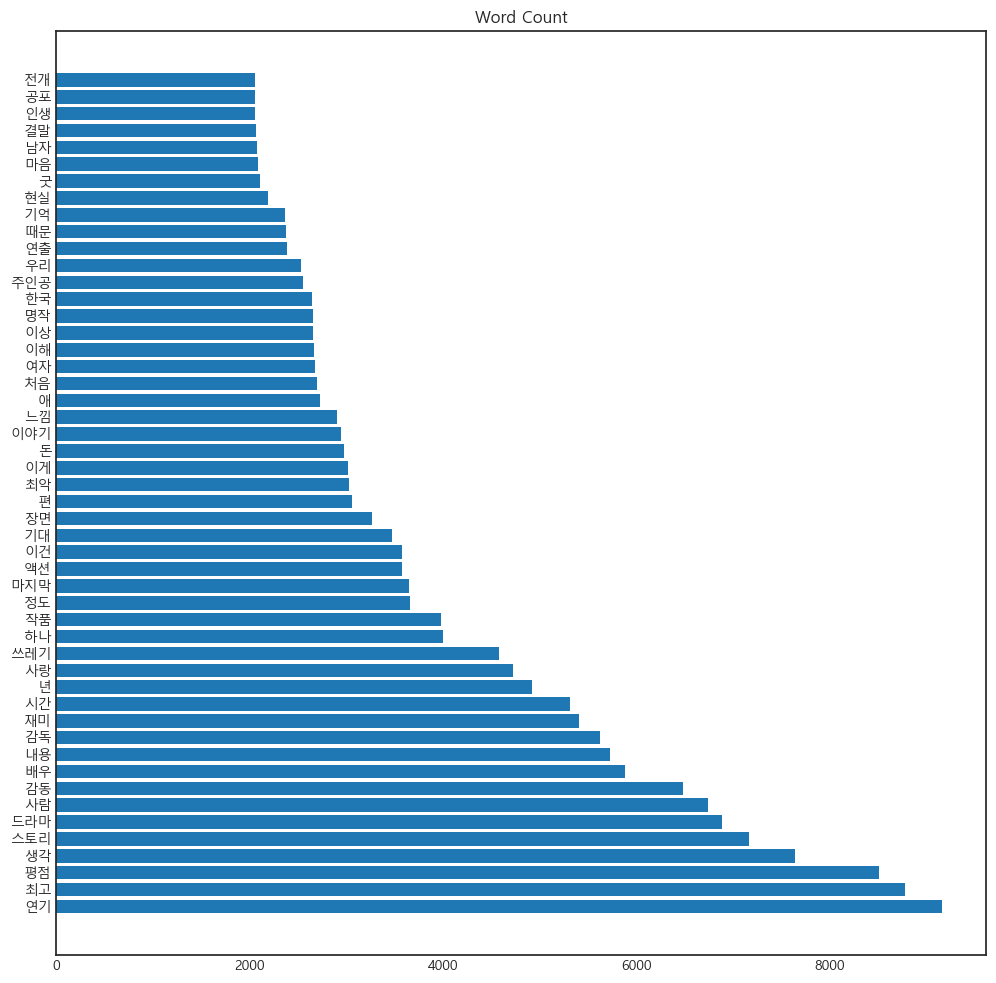

In [44]:
import numpy as np

y_pos = np.arange(len(top_nouns))

plt.figure(figsize = (12,12))
plt.barh(y_pos, top_nouns.values())
plt.title("Word Count")
plt.yticks(y_pos, top_nouns.keys())
plt.show()

### 워드 클라우드(WordCloud)

###### 텍스트에 담겨있는 여러 형태소들의 등장 빈도를 가장 직관적으로 시각화 하는 방법
###### 텍스트에 등장하는 단어를 그 등장 빈도에 따라 서로 크기가 다르게 구름 형태로 표현함으로써, 단어의 빈도 수를 한번에 알 수 있음
###### 최근에 많은 서비스들이 어떤 핵심어가 많이 등장했는가를 워드 클라우드 형식으로 시각화
###### 빈도 수만을 시각적으로 표현한 것이기 때문에, 단어들 사이의 연관성이나 의미 구조 등을 분석하는 데는 한계가 있음

###### 파이썬에서 워드 클라우드를 시각화 하기 위해 matplotlib 라이브러리와 WordCloud 라이브러리를 import 해서 사용
###### WordCloud 라이브러리는 pip install wordcloud 명령어를 통해 설치 필요

In [45]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 4.6 MB/s eta 0:00:00


###### WordCloud를 이용해 객체를 생성해주고, generate_from_frequencies()함수로 빈도 수에 따라 워드클라우드 생성

In [46]:
from wordcloud import WordCloud

wc = WordCloud(background_color = "white", font_path = "./nanum-all/Nanum_font/Nanum_gothic/NanumGothic.ttf")
wc.generate_from_frequencies(top_nouns)

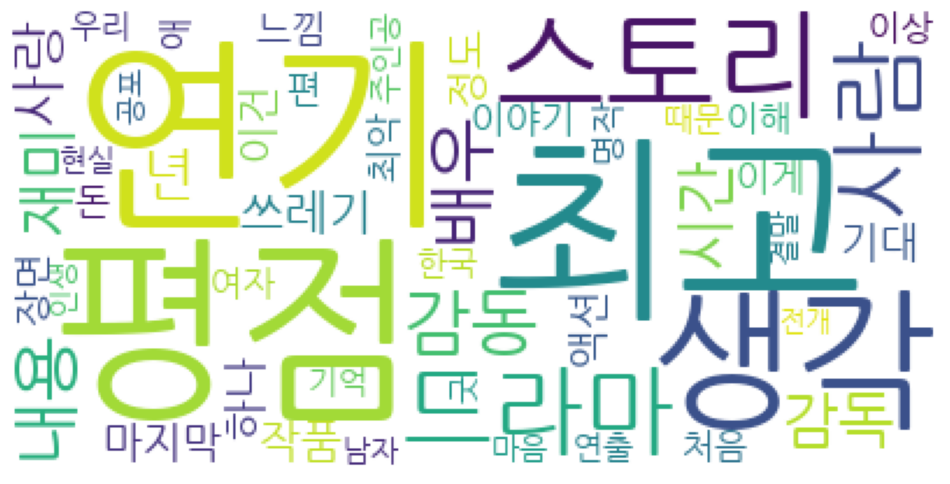

In [49]:
figure = plt.figure(figsize = (12,12))
ax = figure.add_subplot(1,1,1)
ax.axis("off")
ax.imshow(wc)
plt.show()

#### squarify 트리맵 시각화

###### squarify는 트리맵 생성을 지원해주는 파이썬 라이브러리
###### squarify 라이브러리를 이용해 키워드와 키워드 빈도 수를 트리맵으로 나타냄

In [50]:
!pip install squarify

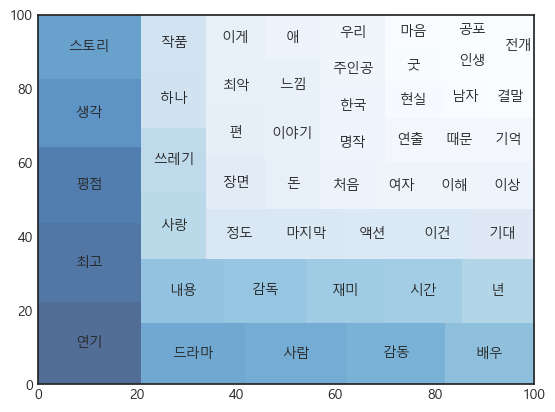

In [52]:
import squarify

norm = mpl.colors.Normalize(vmin = min(top_nouns.values()),
                            vmax = max(top_nouns.values()))
colors = [matplotlib.cm.Blues(norm(value)) for value in top_nouns.values()]

squarify.plot(label = top_nouns.keys(),
              sizes = top_nouns.values(),
              color = colors,
              alpha=.7);